In [6]:
from pydantic import BaseModel
import pandas as pd 
import os
from dotenv import load_dotenv
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
load_dotenv()
import os 
from langchain_core.messages import HumanMessage, SystemMessage
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GOOGLE_SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")
from typing import Annotated, Literal, TypedDict

import bs4

from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough,RunnableLambda
from langchain_google_genai import ChatGoogleGenerativeAI,GoogleGenerativeAIEmbeddings
from langchain_groq import ChatGroq
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import FlashrankRerank
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.load import dumps, loads
from langchain.prompts import PromptTemplate,ChatPromptTemplate
from langchain_google_genai import GoogleGenerativeAIEmbeddings,ChatGoogleGenerativeAI
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)
# llm = ChatGroq(temperature=0, model_name="Gemma2-9b-It")
from langgraph.graph.message import add_messages
from pydantic import BaseModel,Field
from langchain_core.tools import tool
from langgraph.graph import StateGraph,MessagesState,END
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph import START,END

import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage,HumanMessage
from typing import Any

In [ ]:
class myclass:
    def __init__(self,factot):
        self.factor=factot
    
    def __call__(self,value):
        return self.factor * value
    

In [4]:
double=myclass(2)
result=double(5)

In [5]:
result

10

In [7]:
class State(TypedDict):
    state:str 


class ReturnNodeValue:
    def __init__(self,node_secret:str):
        self._value=node_secret
    
    def __call__(self,state:State)->Any:
        print(f"Adding {self._value}to {state['state']}")
        return {"state":[self._value]}
        

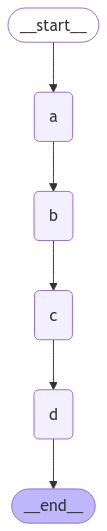

Adding I'm Ato []
Adding I'm Bto ["I'm A"]
Adding I'm Cto ["I'm B"]
Adding I'm Dto ["I'm C"]


{'state': ["I'm D"]}

In [10]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"state": []})

In [9]:
graph.invoke({"state": []})

Adding I'm Ato []
Adding I'm Bto ["I'm A"]
Adding I'm Cto ["I'm B"]
Adding I'm Dto ["I'm C"]


{'state': ["I'm D"]}

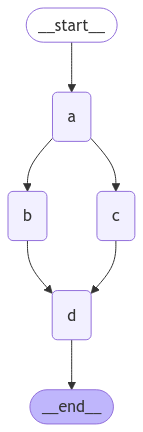

In [14]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))



In [ ]:
#this will give an erro r

In [17]:
# implementing reducer

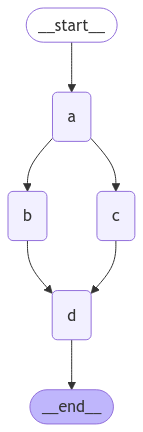

In [18]:
import operator 
from typing import Annotated,Any 
class State(TypedDict):
    state:Annotated[list,operator.add]

builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


In [19]:

from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(f"An error occurred: {e}")

Adding I'm Ato []
Adding I'm Bto ["I'm A"]
Adding I'm Cto ["I'm A"]
Adding I'm Dto ["I'm A", "I'm B", "I'm C"]


In [28]:
## REal world working wiht lls

In [29]:
class State(TypedDict):
    question:str 
    answer:str
    context:Annotated[list,operator.add]

In [30]:
from langchain_core.messages import HumanMessage, SystemMessage

from langchain_community.document_loaders import WikipediaLoader
from langchain_community.tools import TavilySearchResults

In [31]:
def searchweb(state):
    tavily_search=TavilySearchResults(max_results=3)
    search_docs=tavily_search.invoke(state["question"])
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 
def search_wikipedia(state):
    
    """ Retrieve docs from wikipedia """

    # Search
    search_docs = WikipediaLoader(query=state['question'], 
                                  load_max_docs=2).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 


In [35]:
def generate_answer(state):
    """Node to"""
    context=state['context']
    question=state['question']
    answer_template = """Answer the question {question} using this context: {context}"""
    answer_instructions = answer_template.format(question=question, 
                                                       context=context) 
    answer=llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"Answer the question.")])
    return {"answer": answer}


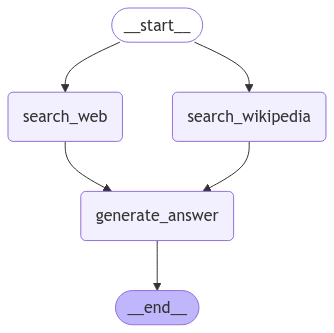

In [36]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("search_web",searchweb)
builder.add_node("search_wikipedia", search_wikipedia)
builder.add_node("generate_answer", generate_answer)

# Flow
builder.add_edge(START, "search_wikipedia")
builder.add_edge(START, "search_web")
builder.add_edge("search_wikipedia", "generate_answer")
builder.add_edge("search_web", "generate_answer")
builder.add_edge("generate_answer", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
result = graph.invoke({"question": "How were Nvidia's Q2 2024 earnings"})
result['answer'].content

"Nvidia's Q2 2024 earnings crushed revenue and EPS estimates. GAAP earnings per diluted share were $2.48, an increase of 854% year-over-year and 202% over the previous quarter.  The company significantly exceeded expectations for both revenue and earnings per share.\n"

In [39]:
#Lesson 2 subgraphs

In [55]:
from typing_extensions import Optional,List,TypedDict

In [56]:
class Log (TypedDict):
    id:str
    question:str 
    docs:Optional[List]
    answer:str
    grade:Optional[str]
    feedback:Optional[str]



In [57]:
class FailureAnalysisstate(TypedDict):
    cleaned_logs:List[Log]
    failures:List[Log]
    processed_logs:List[str]

class FailureAnalysisOutput(TypedDict):
    fa_summary:str
    processed_logs:List[str]


In [58]:
def get_failures(state):
    cleaned_logs=state["failures"]
    failures=[log for log in cleaned_logs if "grade" in log ]
    return {"failures": failures}

def generate_summary(state):
    failures=state["failures"]
    fa_summary = "Poor quality retrieval of Chroma documentation."
    return {"fa_summary": fa_summary, "processed_logs": [f"failure-analysis-on-log-{failure['id']}" for failure in failures]}

/tmp/ipykernel_70362/1845320402.py:1: LangGraphDeprecationWarning: Initializing StateGraph without state_schema is deprecated. Please pass in an explicit state_schema instead of just an input and output schema.
  fa_builder = StateGraph(input=FailureAnalysisstate,output=FailureAnalysisOutput)


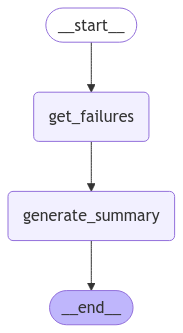

In [59]:
fa_builder = StateGraph(input=FailureAnalysisstate,output=FailureAnalysisOutput)
fa_builder.add_node("get_failures", get_failures)
fa_builder.add_node("generate_summary", generate_summary)
fa_builder.add_edge(START, "get_failures")
fa_builder.add_edge("get_failures", "generate_summary")
fa_builder.add_edge("generate_summary", END)

graph = fa_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [60]:
from operator import add
from typing_extensions import TypedDict
from typing import List, Optional, Annotated

# The structure of the logs
class Log(TypedDict):
    id: str
    question: str
    docs: Optional[List]
    answer: str
    grade: Optional[int]
    grader: Optional[str]
    feedback: Optional[str]

/tmp/ipykernel_70362/1460384100.py:29: LangGraphDeprecationWarning: Initializing StateGraph without state_schema is deprecated. Please pass in an explicit state_schema instead of just an input and output schema.
  fa_builder = StateGraph(input=FailureAnalysisState,output=FailureAnalysisOutputState)


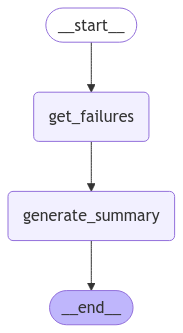

In [64]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Failure Analysis Sub-graph
class FailureAnalysisState(TypedDict):
    cleaned_logs: List[Log]
    failures: List[Log]
    fa_summary: str
    processed_logs: List[str]

class FailureAnalysisOutputState(TypedDict):
    fa_summary: str
    processed_logs: List[str]

def get_failures(state):
    """ Get logs that contain a failure """
    cleaned_logs = state["cleaned_logs"]
    failures = [log for log in cleaned_logs if "grade" in log]
    print(failures)
    return {"failures": failures}

def generate_summary(state):
    """ Generate summary of failures """
    failures = state["failures"]
    # Add fxn: fa_summary = summarize(failures)
    fa_summary = "Poor quality retrieval of Chroma documentation."
    return {"fa_summary": fa_summary, "processed_logs": [f"failure-analysis-on-log-{failure['id']}" for failure in failures]}

fa_builder = StateGraph(input=FailureAnalysisState,output=FailureAnalysisOutputState)
fa_builder.add_node("get_failures", get_failures)
fa_builder.add_node("generate_summary", generate_summary)
fa_builder.add_edge(START, "get_failures")
fa_builder.add_edge("get_failures", "generate_summary")
fa_builder.add_edge("generate_summary", END)

graph = fa_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [66]:
# Dummy logs
question_answer = Log(
    id="1",
    question="How can I import ChatOllama?",
    answer="To import ChatOllama, use: 'from langchain_community.chat_models import ChatOllama.'",
)

question_answer_feedback = Log(
    id="2",
    question="How can I use Chroma vector store?",
    answer="To use Chroma, define: rag_chain = create_retrieval_chain(retriever, question_answer_chain).",
    grade=0,
    grader="Document Relevance Recall",
    feedback="The retrieved documents discuss vector stores in general, but not Chroma specifically",
)

raw_logs = [question_answer,question_answer_feedback]
graph.invoke({"failures": raw_logs})

KeyError: 'cleaned_logs'

In [93]:
#Map-reduce

In [105]:

# Prompts we will use
subjects_prompt = """Generate a list of 3 sub-topics that are all related to this overall topic: {topic}."""
joke_prompt = """Generate a joke about {subject}"""
best_joke_prompt = """Below are a bunch of jokes about {topic}. Select the best one! Return the ID of the best one, starting 0 as the ID for the first joke. Jokes: \n\n  {jokes}"""

In [106]:
class Subjects(BaseModel):
    subjects:List[str]

class BestJoke(BaseModel):
    id:int 

class OverallState(TypedDict):
    topic:str 
    subjects:list
    jokes:Annotated[list,operator.add]
    best_selected_joke:str

In [108]:
def generate_topics(state:OverallState):
    prompt=subjects_prompt.format(topic=state["topic"])
    response=llm.with_structured_output(Subjects).invoke(prompt)
    print("BELo is resposne")
    print(response)
    print("finish")
    print(response.subjects)
    print("gin")
    
    return {"subjects": response.subjects}

In [109]:
from langgraph.constants import Send
def continue_to_jokes(state: OverallState):
    return [Send("generate_joke", {"subject": s}) for s in state["subjects"]]

In [111]:
class JokeState(TypedDict):
    subject: str

class Joke(BaseModel):
    joke: str

def generate_joke(state: JokeState):
    prompt = joke_prompt.format(subject=state["subject"])
    response = llm.with_structured_output(Joke).invoke(prompt)
    return {"jokes": [response.joke]}

In [112]:
def best_joke(state: OverallState):
    jokes = "\n\n".join(state["jokes"])
    prompt = best_joke_prompt.format(topic=state["topic"], jokes=jokes)
    response = llm.with_structured_output(BestJoke).invoke(prompt)
    return {"best_selected_joke": state["jokes"][response.id]}

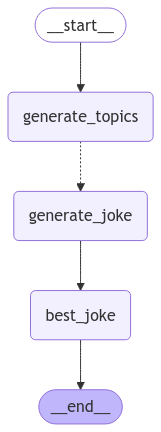

In [113]:
from IPython.display import Image
from langgraph.graph import END, StateGraph, START

# Construct the graph: here we put everything together to construct our graph
graph = StateGraph(OverallState)
graph.add_node("generate_topics", generate_topics)
graph.add_node("generate_joke", generate_joke)
graph.add_node("best_joke", best_joke)
graph.add_edge(START, "generate_topics")
graph.add_conditional_edges("generate_topics", continue_to_jokes, ["generate_joke"])
graph.add_edge("generate_joke", "best_joke")
graph.add_edge("best_joke", END)

# Compile the graph
app = graph.compile()
Image(app.get_graph().draw_mermaid_png())

In [114]:
# Call the graph: here we call it to generate a list of jokes
for s in app.stream({"topic": "animals"}):
    print(s)

BELo is resposne
subjects=['Mammals', 'Birds', 'Fish']
finish
['Mammals', 'Birds', 'Fish']
gin
{'generate_topics': {'subjects': ['Mammals', 'Birds', 'Fish']}}
{'generate_joke': {'jokes': ['Why did the whale cross the ocean? To get to the other tide!']}}
{'generate_joke': {'jokes': ["Why don't fish play poker in the jungle?\nToo many Cheetahs!"]}}
{'generate_joke': {'jokes': ['Why did the bird go to the library? Because it wanted to learn how to tweet better!']}}


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


{'best_joke': {'best_selected_joke': "Why don't fish play poker in the jungle?\nToo many Cheetahs!"}}
